# Pre-requisites

#### Create an Anaconda environment:

    create -n <env_name> python=3.8

    conda install jupyter ipykernel numpy pandas matplotlib (part1 & part2)

    conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch (part 2)
    
The Hugging face library (needed for the second part of this lab)

    pip install gensim --user (part 1)
    
    pip install transformers (part 2)

    

   
The Hugging face library (needed for the second part of this lab)

    pip install transformers

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 6.0MB/s 
     |████████████████████████████████| 1.1MB 37.6MB/s 
     |████████████████████████████████| 890kB 36.3MB/s 
     |████████████████████████████████| 2.9MB 38.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=f9bbdf0ea5424b854599c9f8a5d52b91065e31b852b37da3da5c0be6da6ab9c5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


# BERT Embeddings

In [ ]:
import numpy as np
import pprint

# Get the interactive Tools for Matplotlib
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

## Initialization, constants, sample texts

In [ ]:
#bert_model_name = 'bert-base-cased'
bert_model_name = 'nboost/pt-bert-base-uncased-msmarco'
CLS_token = "[CLS]"
SEP_token = "[SEP]"

In [ ]:
passages = [
    "A physician assistant in the United States, Canada and other select countries or physician associate in the United Kingdom (PA) is an Advanced Practice Provider (APP).",
    "PAs are medical professionals who diagnose illness, develop and manage treatment plans, prescribe medications, and often serve as a patient’s principal healthcare provider.",
    "Jim Kenney, the Democratic mayor of Philadelphia, has just spoken at a press conference with election officials.",
    "The input to BERT is a sequence of words, and the output is a sequence of vectors."
]

In [ ]:
sample_treccast2019_topic = {
    "number": 1,
    "description": "Considering career options for becoming a physician\u0027s assistant vs a nurse.  Discussion topics include required education (including time, cost), salaries, and which is better overall.",
    "turn": [
      {
        "number": 1,
        "raw_utterance": "What is a physician\u0027s assistant?"
      },
      {
        "number": 2,
        "raw_utterance": "What are the educational requirements required to become one?"
      },
      {
        "number": 3,
        "raw_utterance": "What does it cost?"
      },
      {
        "number": 4,
        "raw_utterance": "What\u0027s the average starting salary in the UK?"
      },
      {
        "number": 5,
        "raw_utterance": "What about in the US?"
      },
      {
        "number": 6,
        "raw_utterance": "What school subjects are needed to become a registered nurse?"
      },
      {
        "number": 7,
        "raw_utterance": "What is the PA average salary vs an RN?"
      },
      {
        "number": 8,
        "raw_utterance": "What the difference between a PA and a nurse practitioner?"
      },
      {
        "number": 9,
        "raw_utterance": "Do NPs or PAs make more?"
      },
      {
        "number": 10,
        "raw_utterance": "Is a PA above a NP?"
      },
      {
        "number": 11,
        "raw_utterance": "What is the fastest way to become a NP?"
      },
      {
        "number": 12,
        "raw_utterance": "How much longer does it take to become a doctor after being an NP?"
      }
    ],
    "title": "Career choice for Nursing and Physician\u0027s Assistant"
  }

## Pre-processing

In [ ]:
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

In [ ]:
encoded_input = tokenizer("The quick brown fox jumps over the lazy dog.")
pprint.pprint(encoded_input)

{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'input_ids': [101,
               1996,
               4248,
               2829,
               4419,
               14523,
               2058,
               1996,
               13971,
               3899,
               102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [ ]:
decoded_input = tokenizer.decode(encoded_input["input_ids"])
decoded_input

'[CLS] the quick brown fox jumps over the lazy dog [SEP]'

## BERT Model

In [ ]:
model = BertModel.from_pretrained(bert_model_name, return_dict=True)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

### BERT Vocabulary

Talk briefly about wordpiece

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

Maximum token length: 18


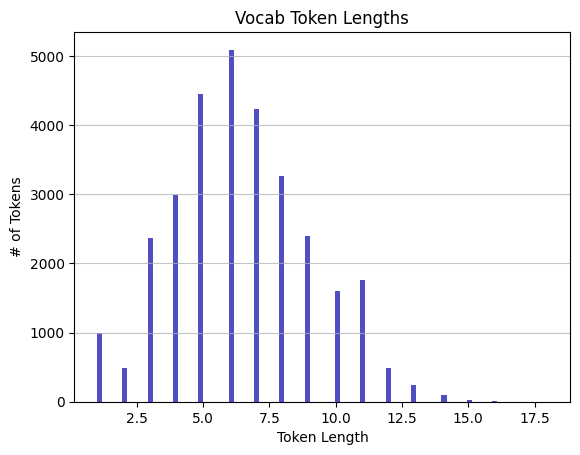

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

n, bins, patches = plt.hist(x=token_lengths, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=2)
plt.grid(axis='y', alpha=0.75)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))
plt.show()

## Encoding a single sentence

In [ ]:
sample_sentence = ["The quick brown fox jumps over the lazy dog"] 

In [ ]:
# Encode the sentence
inputs = tokenizer(
    text=sample_sentence,  # the sentence to be encoded
    add_special_tokens=True,  # Add [CLS] and [SEP] (default is True)
    max_length = 512,  # maximum length of a sentence
    pad_to_max_length=False,  # Add [PAD]s
    return_attention_mask = True,  # Generate the attention mask
    return_tensors = 'pt',  # ask the function to return PyTorch tensors
)

In [ ]:
inputs

{'input_ids': tensor([[  101,  1996,  4248,  2829,  4419, 14523,  2058,  1996, 13971,  3899,
           102],
        [  101,  1996,  4248,  2829,  4419, 14523,  2058,  1996, 13971,  3899,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
inputs["input_ids"].shape

torch.Size([2, 11])

In [ ]:
tokenizer.decode(inputs["input_ids"][0])

'[CLS] the quick brown fox jumps over the lazy dog [SEP]'

In [ ]:
outputs = model(**inputs)

In [ ]:
outputs["last_hidden_state"][0, 2].shape

torch.Size([768])

## BERT for Learning to Rank

Recall this slide from the Learning to Rank lecture.

Goal: 

*   You will use BERT to replace this whole set of individual features extracted from your collection;
*   Then, learn a classifier based on BERT features instead.

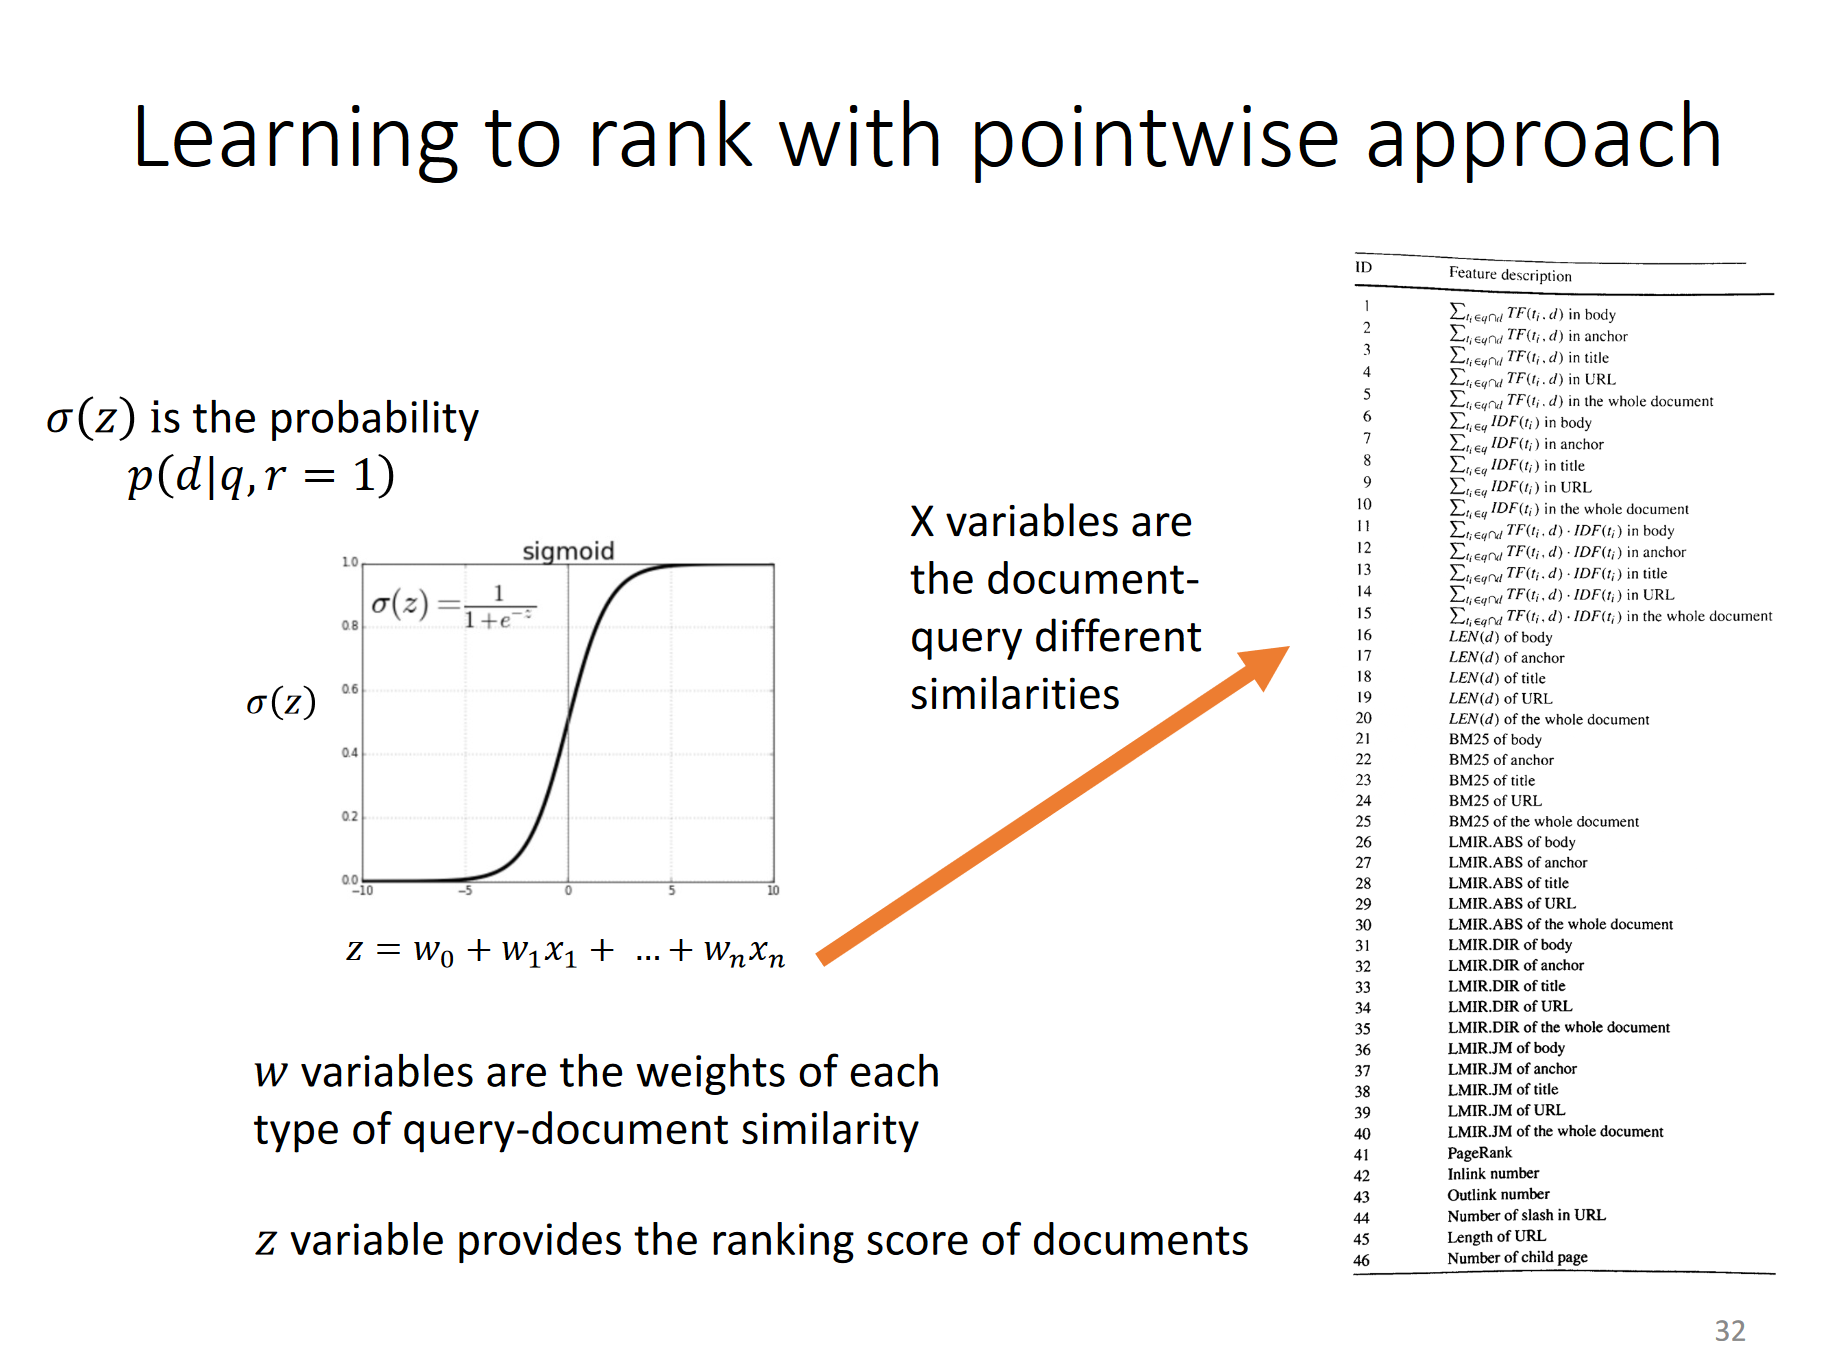

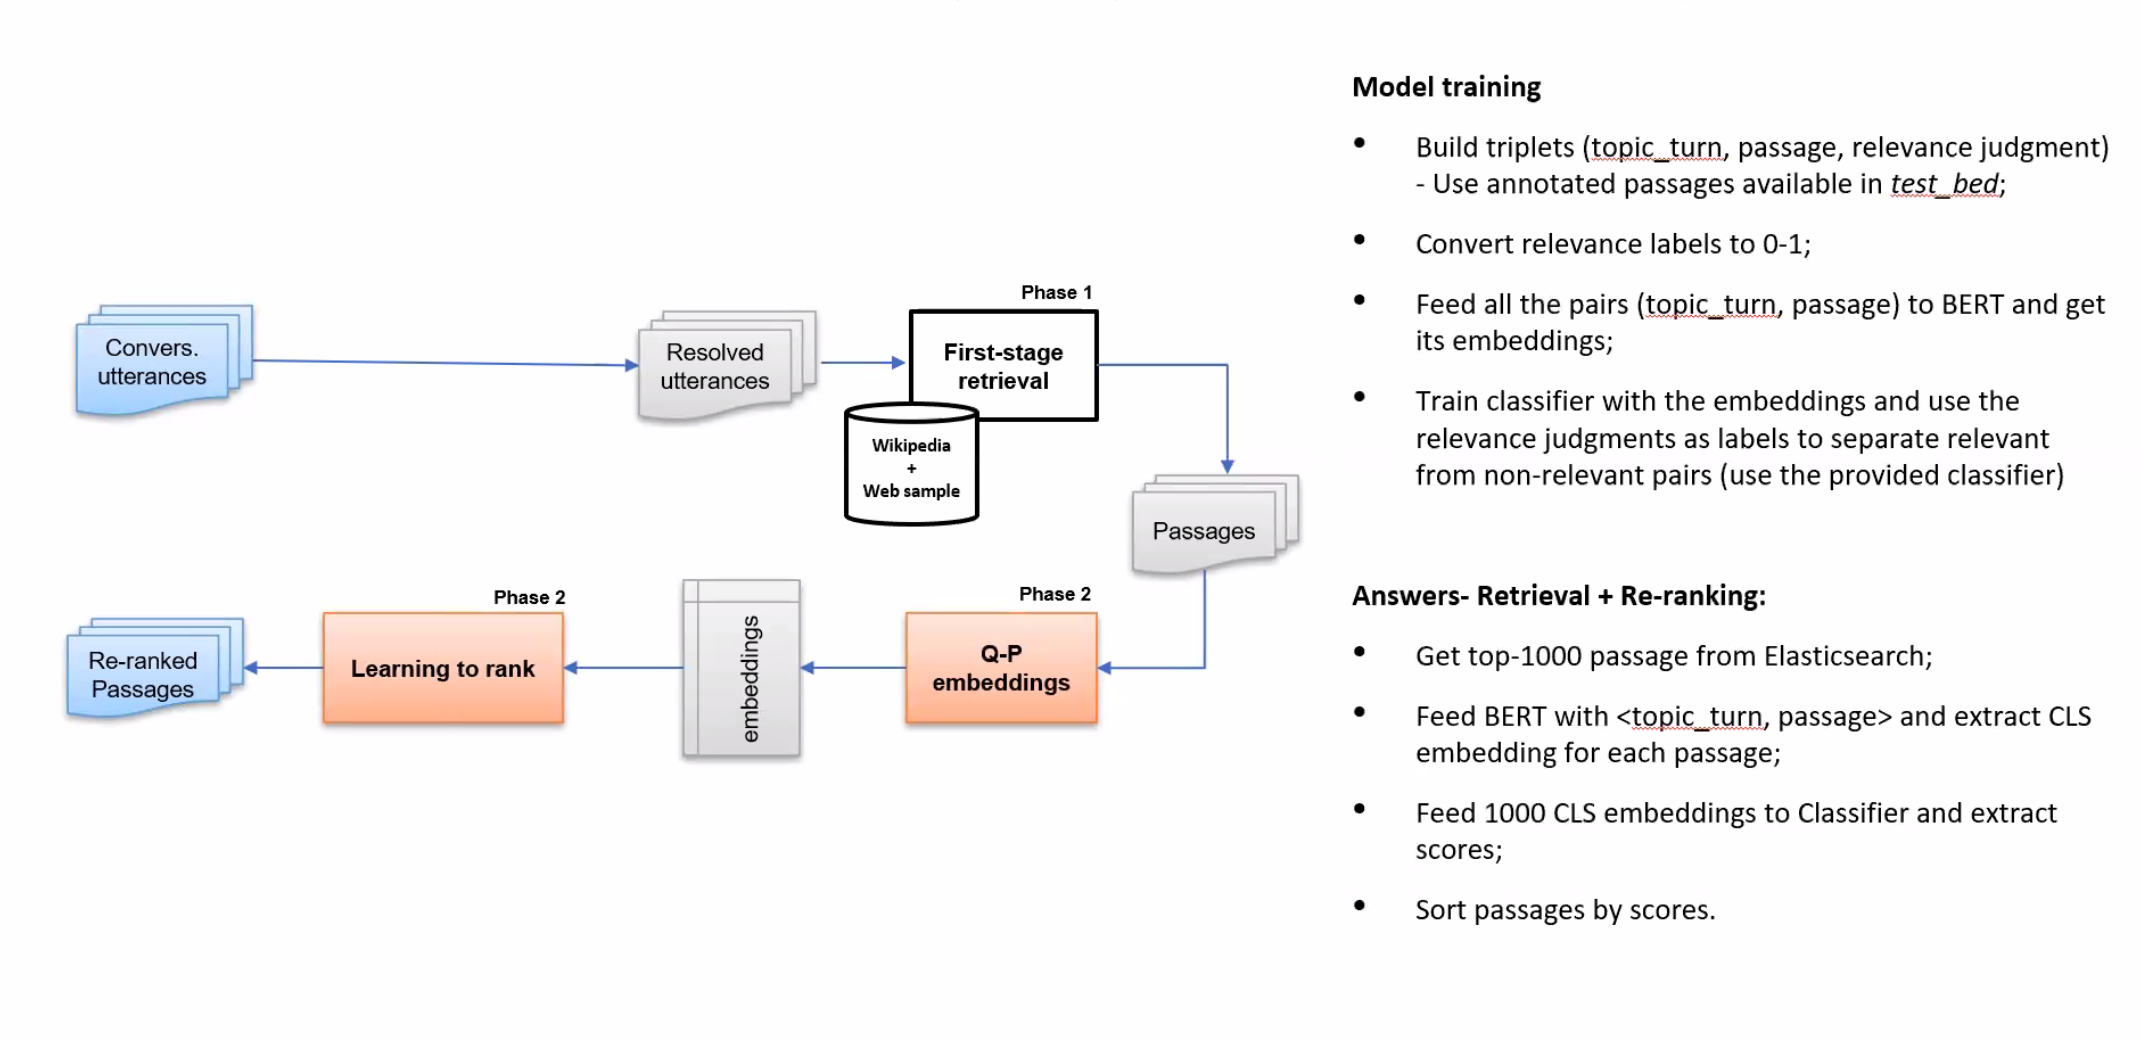

In [ ]:
# inspired by: https://github.com/nyu-dl/dl4marco-bert/blob/e6fdc7fd13ade0a8d7cde8c232529c8542a93549/tokenization.py

def convert_to_bert_input(sentences, max_seq_length, tokenizer, add_cls, return_tensors="pt"):

    # The convention in BERT is:
    # (a) For sequence pairs:
    #  tokens:   [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]
    #  type_ids: 0   0  0    0    0     0       0 0    1  1  1  1   1 1
    # (b) For single sequences:
    #  tokens:   [CLS] the dog is hairy . [SEP]
    #  type_ids: 0   0   0   0  0     0 0
    #
    # Where "type_ids" are used to indicate whether this is the first
    # sequence or the second sequence. The embedding vectors for `type=0` and
    # `type=1` were learned during pre-training and are added to the wordpiece
    # embedding vector (and position vector). 
    #
    # For classification tasks, the first vector (corresponding to [CLS]) is
    # used as as the "sentence vector".
    
    # Tokenize both sentences
    sentences_tokens = [tokenizer.tokenize(s + SEP_token) for s in sentences]
    
    # Combine sentences tokens on a single list
    tokens = sum(sentences_tokens, [])
    
    if add_cls:
        tokens = [CLS_token] + tokens

    # Create Token type ids tensors
    token_type_ids = [[i]*len(s) for i, s in enumerate(sentences_tokens)] # Acount for the SEP token we've just added
    token_type_ids = [0] + sum(token_type_ids, []) # CLS + The whole token_type_ids flattened

    # Remove tokens if max_seq_length is exceeded
    # Account for [CLS] and [SEP] with "- 3"
    if len(tokens) > max_seq_length - 3:
        tokens = tokens[:max_seq_length - 4] + [tokens[-1]] # keep SEP token
        token_type_ids = token_type_ids[:max_seq_length - 3]

    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    
     # Create Attention mask tensor -> Which tokens should BERT consider
    attention_mask = [1]*len(tokens)
    
    if return_tensors == "pt":
        input_ids = torch.tensor([input_ids], dtype=torch.long)
        token_type_ids = torch.tensor([token_type_ids], dtype=torch.long)
        attention_mask = torch.tensor([attention_mask], dtype=torch.long)
    
    data = {
        "input_ids": input_ids,
        "token_type_ids": token_type_ids,
        "attention_mask": attention_mask
    }

    return data

In [ ]:
query_1 = sample_treccast2019_topic["turn"][1]["raw_utterance"]
passage_1 = passages[1]
query_1, passage_1

('What are the educational requirements required to become one?',
 'PAs are medical professionals who diagnose illness, develop and manage treatment plans, prescribe medications, and often serve as a patient’s principal healthcare provider.')

In [ ]:
sentences = [query_1, passage_1]
sentences = [query_1, passage_2]
sentences = [query_1, passage_3]

In [ ]:
inputs_qa = convert_to_bert_input(sentences=sentences, max_seq_length=512, tokenizer=tokenizer, add_cls=True)
inputs_qa

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[  101,  2054,  2024,  1996,  4547,  5918,  3223,  2000,  2468,  2028,
           1029,   102, 14674,  2024,  2966,  8390,  2040, 22939, 26745,  3366,
           7355,  1010,  4503,  1998,  6133,  3949,  3488,  1010,  3653, 29234,
          20992,  1010,  1998,  2411,  3710,  2004,  1037,  5776,  1521,  1055,
           4054,  9871, 10802,  1012,   102]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
inputs_qa['input_ids'].shape

torch.Size([1, 45])

In [ ]:
decoded_input_qa = tokenizer.decode(inputs_qa["input_ids"][0])
decoded_input_qa

'[CLS] what are the educational requirements required to become one? [SEP] pas are medical professionals who diagnose illness, develop and manage treatment plans, prescribe medications, and often serve as a patient ’ s principal healthcare provider. [SEP]'

In [ ]:
outputs_qa = model(**inputs_qa)

In [ ]:
outputs_qa["last_hidden_state"][0,0].shape

torch.Size([768])

Exercise: The embedding of the [CLS] token consists of a vector with 768 dimensions.
Based on the Learning to Rank framework you've seen on the last class, how can we use this embedding to rank a query Q with a passage P? 

# Visualizing BERT Word Embeddings

Exercise: Select a set of sentences and extract BERT word embeddings. Then, visualize these word embeddings.

In [ ]:
for i, token_str in enumerate(decoded_input_qa.split(" ")):
    print(i, token_str)

0 [CLS]
1 What
2 are
3 the
4 educational
5 requirements
6 required
7 to
8 become
9 one?
10 [SEP]
11 PAs
12 are
13 medical
14 professionals
15 who
16 diagnose
17 illness,
18 develop
19 and
20 manage
21 treatment
22 plans,
23 prescribe
24 medications,
25 and
26 often
27 serve
28 as
29 a
30 patient
31 ’
32 s
33 principal
34 healthcare
35 provider.
36 [SEP]


In [ ]:
# USE T-SNE to visualize BERT word embeddings

## More

 - BERT Passage Re-ranking (https://arxiv.org/abs/1901.04085)
 
 - Huggingface Library Docs: (https://huggingface.co/transformers/)

